# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: February 6, 2026**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

The objective of the experiment is to determine whether the aging time (3, 4, or 5 weeks) has an effect on the bitterness of the IPA. The bitterness is measured by International Bitterness Units (IBUs). In other words, the experiment aims to see if different aging durations produce a statistically significant difference in IPA's  bitterness.

**Question 2.** Specify the outcome variable

The outcome variable is the bitterness of the IPA. It is measured by quantitatively in IBUs by using spectrophotometer.

**Question 3.** Specify the independent variable. What are some possible lurking variables?

The independent variable is the aging time with three levels (3, 4, or 5 weeks)
Some of the lurking varaibles are
      - Temperature variations during aging
      - Contamination or microbial activity
      - Oxygen exposure in the tanks

**Question 4.** Briefly explain why a completely randomized design may be appropriate for this experiment.

Completely randomized design might be appropriate for this experiment because all bottles are randomly assigned to aging times, which helps control for other factors and ensures that differences in bitterness (IBUs) are due to aging time rather than other variables. It's simple, fair, and effective for this experiment.

**Question 5.** State the null and alternative hypotheses for this experiment.

Null hypotheses:- Aging time has no effect on the bitterness of the IPA.

Alternative hypotheses:- Aging time does affect the bitterness of the IPA. At least one aging time has a different mean IBU than the others.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?



In [1]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "MihretTe"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
   print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
       print(f"📥 Cloning repo from {repo_url}...")
       os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
   print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
   print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")

📥 Cloning repo from https://github.com/MihretTe/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/MihretTe/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


In [7]:
# IPA Aging Time Analysis
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
# Load the data (from repo folder)
# Assumes IPA.xlsx is stored in:
# STAT-7220-Applied-Experimental-Design/Assignments/HW1/

data_file = "IPA.xlsx"

if not os.path.exists(data_file):
    raise FileNotFoundError(f"❌ {data_file} not found. Make sure it is in the HW1 folder.")

IPA = pd.read_excel(data_file)

# Preview the data (does NOT affect analysis)
IPA.head()



,Weeks,IBU
0,3 Weeks,39.41
1,3 Weeks,53.18
2,3 Weeks,35.31
3,3 Weeks,59.62
4,3 Weeks,40.95


In [8]:
#Summary statistics by aging time
summary_stats = IPA.groupby("Weeks")["IBU"].agg(
    Mean="mean",
    Median="median",
    Std_Dev="std",
    Min="min",
    Max="max"
)

summary_stats


,Mean,Median,Std_Dev,Min,Max
Weeks,,,,,
3 Weeks,49.216,50.785,8.300656,35.31,59.62
4 Weeks,62.751,65.780,8.250384,47.82,71.70
5 Weeks,69.725,70.950,5.631258,60.09,78.03


<Figure size 640x480 with 0 Axes>

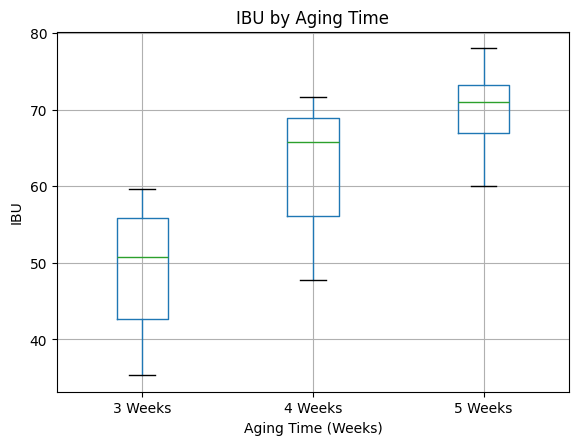

In [9]:
#Boxplot (distribution comparison)
plt.figure()
IPA.boxplot(column="IBU", by="Weeks")
plt.title("IBU by Aging Time")
plt.suptitle("")  # remove extra title
plt.xlabel("Aging Time (Weeks)")
plt.ylabel("IBU")
plt.show()


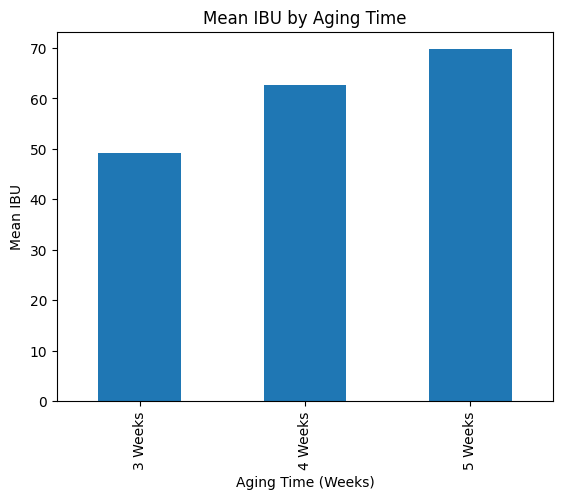

In [10]:
#Mean IBU by Aging Time
means = IPA.groupby("Weeks")["IBU"].mean()

plt.figure()
means.plot(kind="bar")
plt.xlabel("Aging Time (Weeks)")
plt.ylabel("Mean IBU")
plt.title("Mean IBU by Aging Time")
plt.show()



Exploratory analysis shows that mean IBUs increase with aging time, with 3-week beer lowest and 5-week beer highest. Boxplots and mean plots reveal an upward shift in bitterness and limited overlap between groups. These results support the alternative hypothesis, indicating that aging time affects IPA bitterness.


**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses. Additionally, describe any limitations of the experiment and/or your analyses, and suggest potential improvements for future experiments of this nature.